# COMP-293A Final Project 

Authors: 

- Sean Malloy
- David Leavenworth

## Dataset: Popular Video Games 1980 - 2023
- Download Link: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023?resource=download 
- Describtion: This dataset contains a list of video games dating from 1980 to 2023 that are listed on Backlogged, which is a video game collection website where people log if they played a game and can rate the game. 
- Motivation: Video games are interesting, and we wanted to learn how trends changed over the years in terms of genres and studio popularity. As a fan of video games, I am interested in what kind of video games are becoming more popular, and what type of trends that we can find that the industry might be interested in pursuing for the future. Also video games are fun, and we thought this might be a fun topic to cover. 

## Variables
- Title: Title of the Game
- Release Date: Date of Release of the game's first version
- Team: Game Developer Team
- Rating: Average Rating
- Times Listed: Number of users who listed this game
- Number of Reviews: Number of reviews received from the users
- Genres: All genres pertaining to a specified game
- Summary: Summary provided by the team
- Reviews: User Reviews
- Plays: Number of users that have played the game before
- Playing: Number of current users who are playing the game.
- Backlogs: Number of users who have access but haven't started with the game yet
- Wishlist: Number of users who wish to play the game

# Getting the data Ready

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn import linear_model, model_selection, metrics

In [2]:
games = pd.read_csv("games.csv", index_col=0)
games.describe(include="all")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
count,1512,1512,1511,1499.000000,1512,1512,1512,1511,1512,1512,1512,1512,1512
unique,1099,987,764,NaN,606,606,255,1112,1117,258,396,544,573
top,Doom,"Nov 12, 2020",['Capcom'],NaN,1.1K,1.1K,"['Adventure', 'RPG']",Minecraft focuses on allowing the player to ex...,[],12K,1.1K,1.5K,1.3K
freq,7,8,35,NaN,46,46,154,4,12,50,24,52,41
mean,NaN,NaN,NaN,3.719346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.532608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has their quantitative veriables as a string, and has them in the format of "14k" for 14,000. So were going to need to convert the variables into a quantitative variable, and change the k into multiplying it by 1000.

In [3]:
# specify the columns to be modified
cols_to_modify = ["Plays", "Playing", "Backlogs", "Wishlist", "Number of Reviews", "Times Listed"]

# use the replace method with the specified columns and dictionary of replacements
games[cols_to_modify] = games[cols_to_modify].apply(lambda x: pd.to_numeric(x.str.replace('K', '')) * 1000 if "K" in str(x) else pd.to_numeric(x))
# display the modified DataFrame
games.describe(include="all")


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
count,1512,1512,1511,1499.000000,1512.000000,1512.000000,1512,1511,1512,1512.000000,1512.000000,1512.000000,1512.000000
unique,1099,987,764,NaN,NaN,NaN,255,1112,1117,NaN,NaN,NaN,NaN
top,Doom,"Nov 12, 2020",['Capcom'],NaN,NaN,NaN,"['Adventure', 'RPG']",Minecraft focuses on allowing the player to ex...,[],NaN,NaN,NaN,NaN
freq,7,8,35,NaN,NaN,NaN,154,4,12,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.719346,334048.941799,334048.941799,NaN,NaN,NaN,58787.632275,174218.915344,235475.595238,276151.058201
std,NaN,NaN,NaN,0.532608,294127.652787,294127.652787,NaN,NaN,NaN,177645.842171,207626.913974,299648.410707,276340.204894
min,NaN,NaN,NaN,0.700000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,1000.000000,1000.000000
25%,NaN,NaN,NaN,3.400000,3900.000000,3900.000000,NaN,NaN,NaN,2700.000000,33000.000000,2100.000000,3100.000000
50%,NaN,NaN,NaN,3.800000,283500.000000,283500.000000,NaN,NaN,NaN,5900.000000,92000.000000,6300.000000,193500.000000
75%,NaN,NaN,NaN,4.100000,549000.000000,549000.000000,NaN,NaN,NaN,13000.000000,235000.000000,461000.000000,473750.000000


We seem to have some outliers for Plays and Playing, and so it might be useful to create a ceiling that might help with that, as there seems to be some outliers in upper ranges.

In [4]:
games = games[games["Plays"]<20000] 
games = games[games["Playing"]<25000]

In [5]:
games = games.dropna()

In [6]:
games.shape

(223, 13)

## 5 Questions That We can try to answer with this data

1. Does the number of reviews positive correlate to more favorable or less favorable ratings
2. Would the number of teams increase the ratings and plays that a game has? For example, would a game made by Ubisoft and Nintendo pull in more players due to appeasing to the fanbases of both? Or does collaborations not have a sway in the number of players.
3. Which geners do better compared to others, and is there a combination of genres that is rated more favorably? 
4. Is video games pregressively increasing for each year, or are there some years that are slumps and some that do much better?
5. Does title length have any bearings on the number of people who plays a game? Since some game titles are really long, and some are short 4 letter titles that gain massive followings, so does having something more memorable help?

## Exploratory Data Analysis

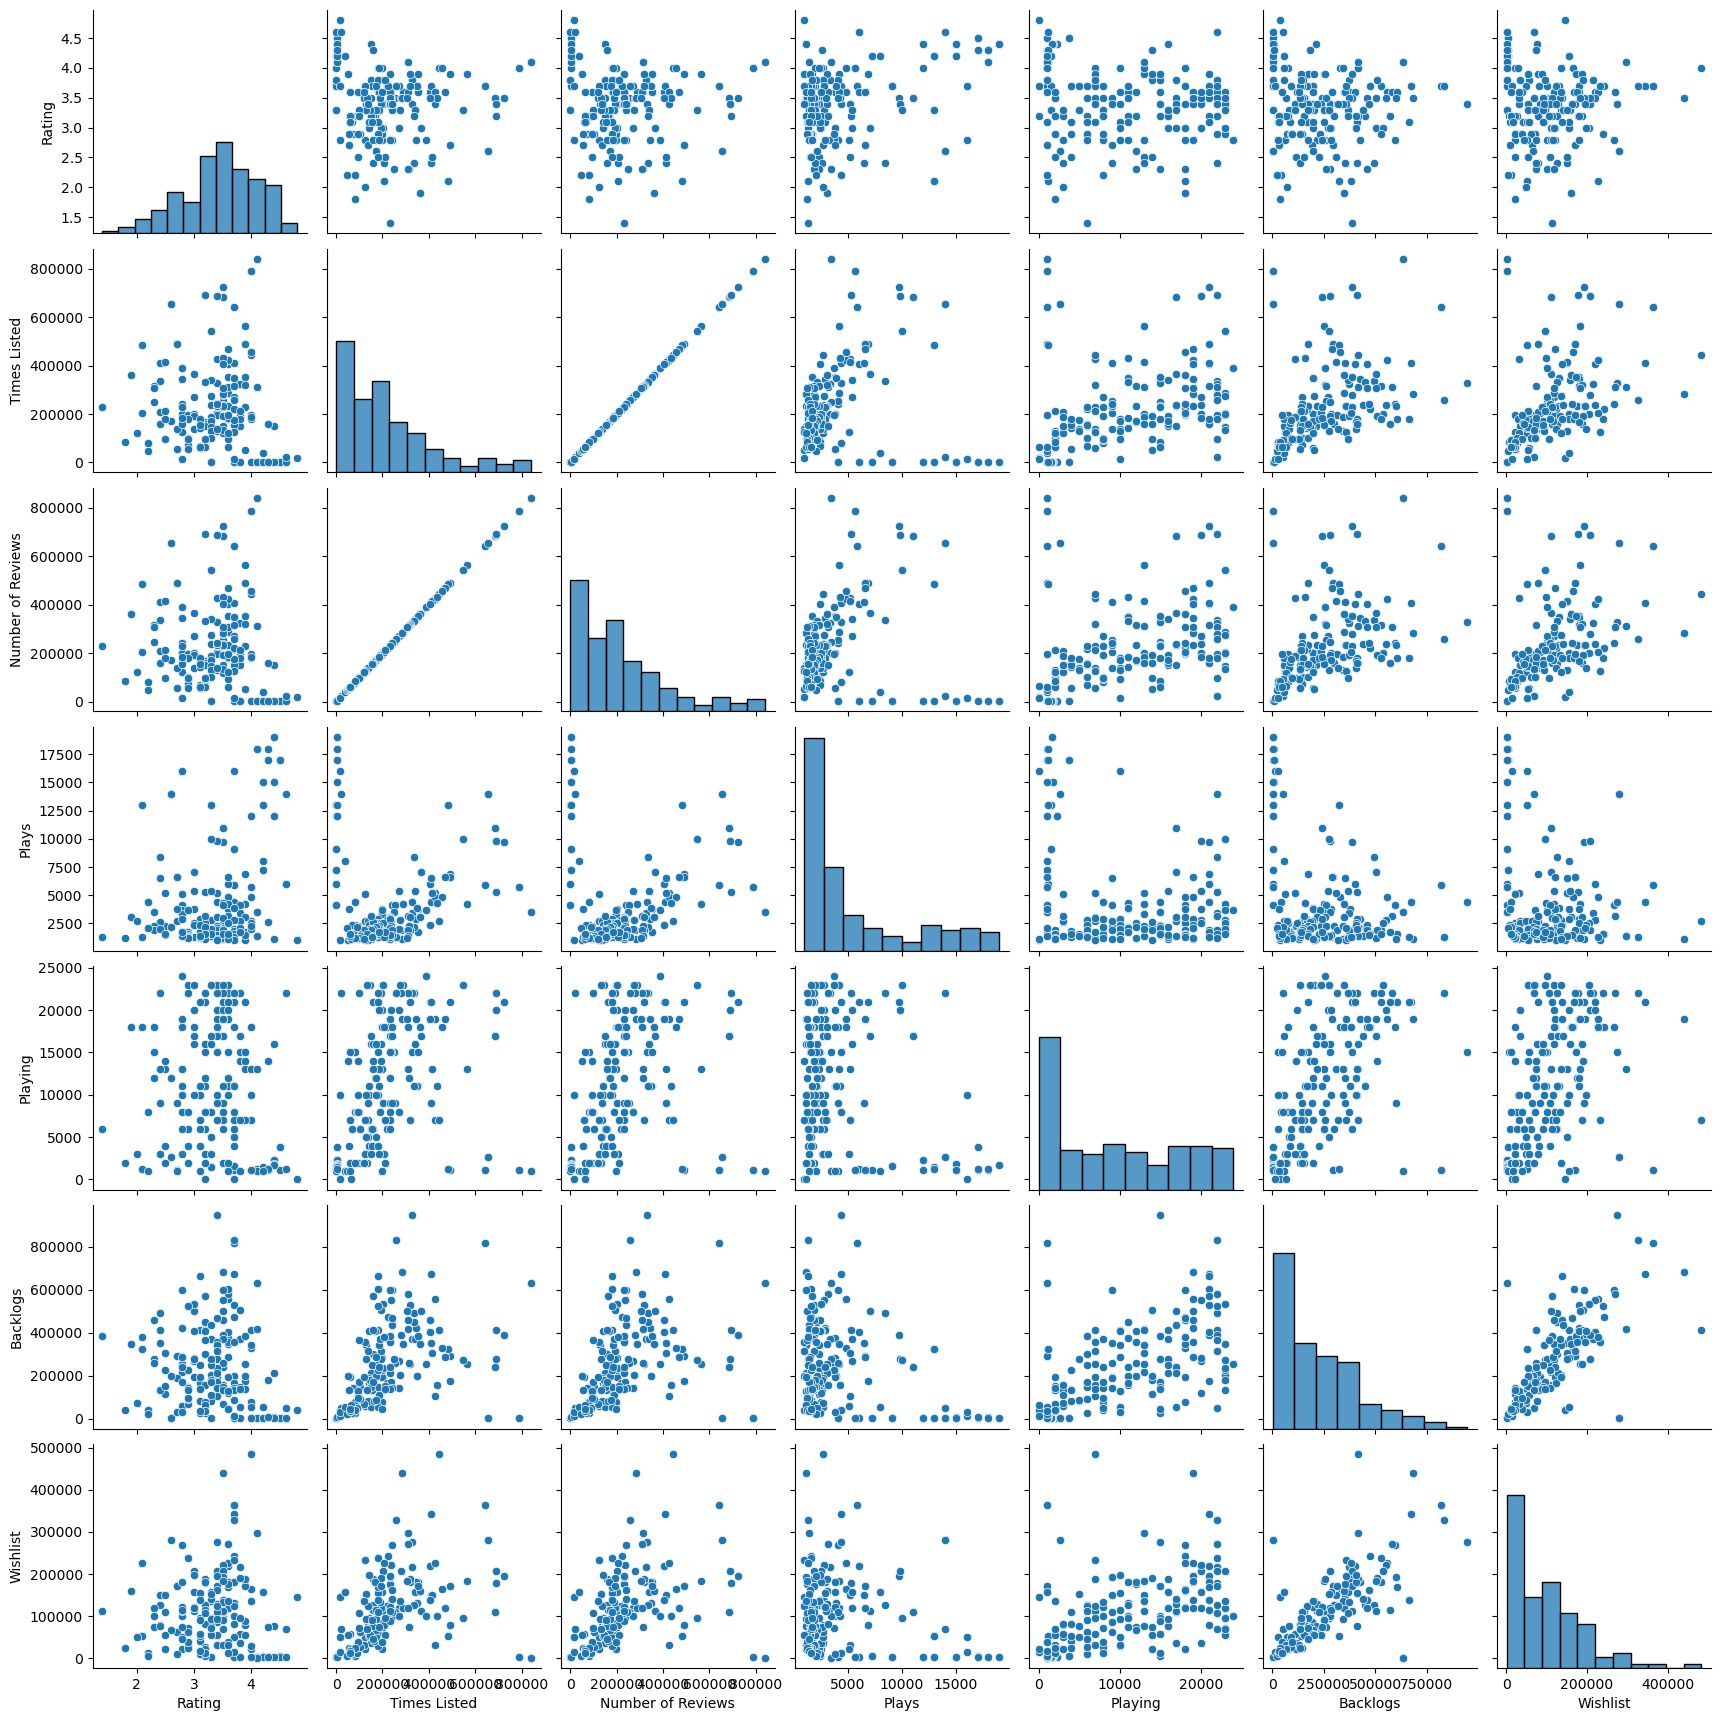

In [7]:
sns.pairplot(data=games)
plt.show()

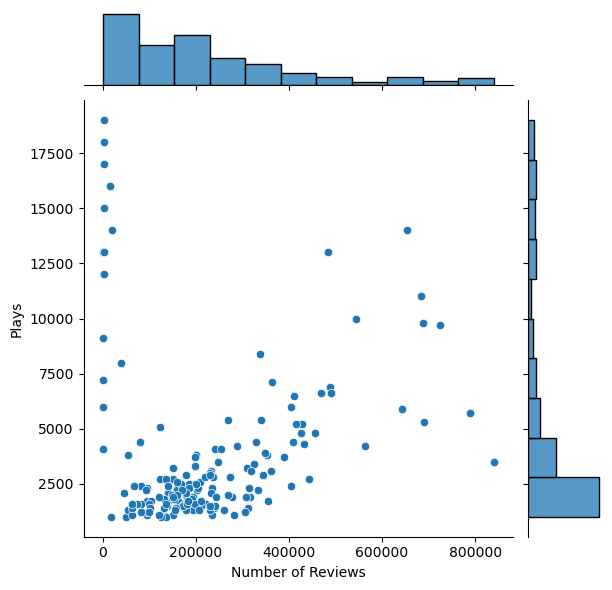

In [8]:
sns.jointplot(data=games, x="Number of Reviews", y="Plays")
plt.show()

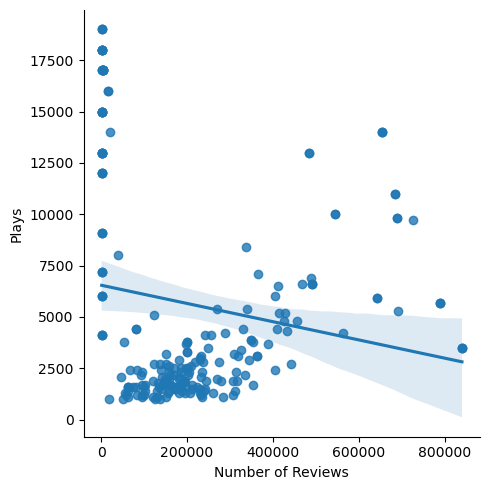

In [9]:
sns.lmplot(data=games, x="Number of Reviews", y="Plays")
plt.show()

Looking at these plots, it seems that there is no or extremely slight correlation between number of Reviews and how many people have played the game. 
It seems that they are pretty much independent of each other, and to my surprise that the number of Reviews seems to make the graph slope downwards a bit, meaning that there might be a slight negative correlation between the data. 
This could be due to the age of the game, as older games might not have as many reviews as newer games, and have had more time t garner more players. It could also be that the more the game got reviewed, the more that glaring issues were presented to people and they didn't want to buy it for one reason or another (IE Review bombing a game)

In [10]:
games["Genres"].value_counts()

['Adventure', 'RPG']                           15
['Fighting']                                   15
['Shooter']                                    15
['Adventure', 'RPG', 'Turn Based Strategy']    13
['Platform']                                    7
                                               ..
['Brawler']                                     1
['Real Time Strategy', 'Strategy']              1
['RPG']                                         1
['Adventure', 'Fighting', 'RPG']                1
['Adventure', 'Puzzle']                         1
Name: Genres, Length: 83, dtype: int64

In [11]:
games["Team"].value_counts()

['Nintendo']                                      6
['Capcom']                                        4
['Bandai Namco Entertainment', 'FromSoftware']    3
['NIS America', 'Atlus']                          3
['Hudson Soft', 'Nintendo']                       3
                                                 ..
['Terry Cavanagh', 'Distractionware']             1
['Capcom Production Studio 4', 'Capcom']          1
['Crytek Frankfurt', 'Electronic Arts']           1
['Halfbrick Studios']                             1
['WB Games', 'TT Fusion']                         1
Name: Team, Length: 157, dtype: int64

## Linear Regression Stats

In [12]:
stats.linregress(x=games["Number of Reviews"], y=games["Rating"])

LinregressResult(slope=-6.985370749049777e-07, intercept=3.592307592296625, rvalue=-0.2156409147426474, pvalue=0.0011939719336753328, stderr=2.1277582300723394e-07, intercept_stderr=0.06251901292911201)

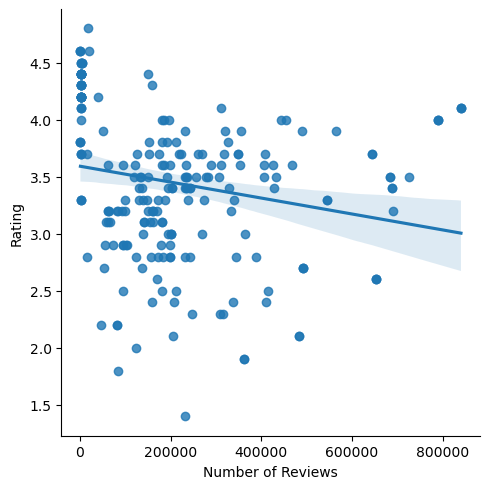

In [13]:
sns.lmplot(data=games, x="Number of Reviews", y="Rating");
plt.show()

When comparing the number of reviews to the overall rating of a game, there seems to be enough evidence of a different to reject the null hypothesis with the pvalue being so low (6.3E-5), however, since the slope is so small as well,nd the rvalue being small, I can conclude that there is probably a lot more than just the number of reviews that determine a games rating, and that the number of reviews only has a slight negative effect on the Ratings. 

In [14]:
stats.linregress(x=games["Plays"], y=games["Rating"])

LinregressResult(slope=5.38722938357895e-05, intercept=3.141485271770332, rvalue=0.43423865055030375, pvalue=1.1380319891820765e-11, stderr=7.517409405764508e-06, intercept_stderr=0.05777555224018961)

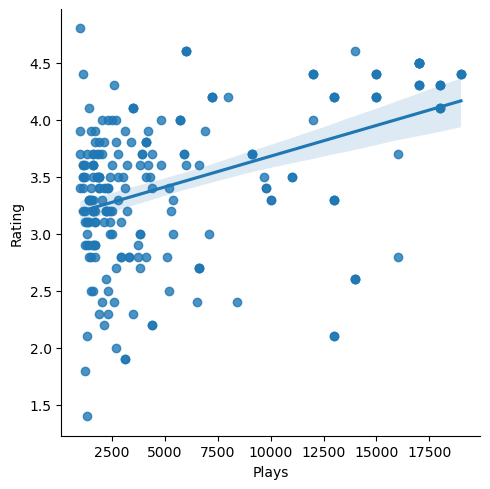

In [15]:
sns.lmplot(data=games, x="Plays", y="Rating");
plt.show()

## Linear Regressions

In [16]:
relevant_data = games[["Plays", "Number of Reviews", "Backlogs", "Playing", "Rating", "Wishlist"]]

### Wishlist

In [17]:
# Removing times listed since it is the same exact data as number of reviews
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("Wishlist", axis=1), relevant_data[["Wishlist"]])
reg = linear_model.LinearRegression().fit(x_train, y_train)

In [18]:
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.5439599164936841
0.6804482662604812


,column,coefficient
4,Rating,-10009.384796
1,Number of Reviews,0.041134
2,Backlogs,0.266483
0,Plays,0.731679
3,Playing,1.736191


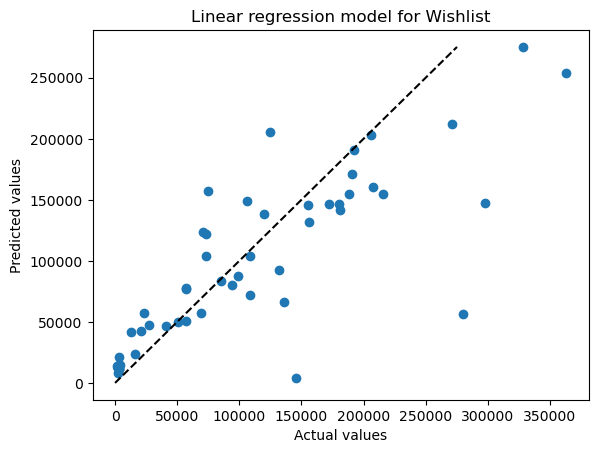

In [19]:
# Predict values using the test data
y_pred = reg.predict(x_test)

# Plot predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear regression model for Wishlist")

# Add a 45-degree line
min_val = min(y_test.any().min(), y_pred.min())
max_val = max(y_test.any().max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.show()

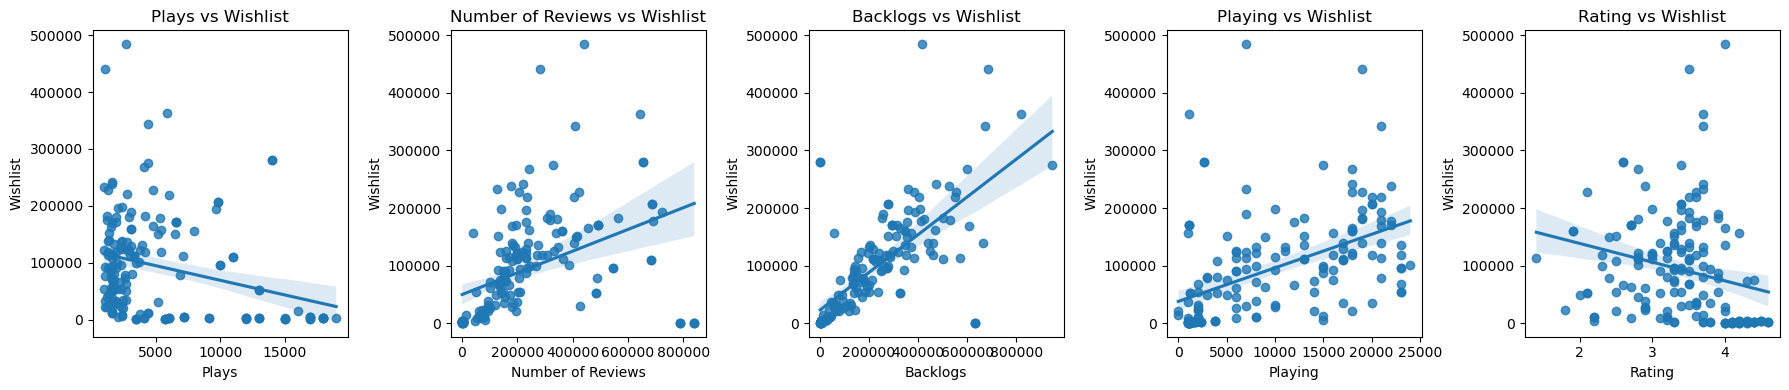

In [20]:
coefs = reg.coef_[0]
coef_names = list(x_train.columns)

# create a dataframe with the coefficients and their names
coef_df = pd.DataFrame({'name': coef_names, 'coef': coefs})

# plot the regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(18, 4))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_train[col], y=y_train.values.ravel(), ax=axs[i])
    axs[i].set_title(f"{col} vs Wishlist")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Wishlist")
    
plt.tight_layout()
plt.show()

In [21]:
reg = linear_model.Ridge().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.5439587234155165
0.680832821275206


,column,coefficient
4,Rating,-9846.516979
1,Number of Reviews,0.041194
2,Backlogs,0.266498
0,Plays,0.723492
3,Playing,1.736177


In [22]:
reg = linear_model.Lasso().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.5439599161504584
0.6804548027908714


,column,coefficient
0,Plays,0.73154
1,Number of Reviews,0.73154
2,Backlogs,0.73154
3,Playing,0.73154
4,Rating,0.73154


The variables with the largest coefiiceint in my models were playing with the largest negative coefficient of -0.16, and ating with a insane coefficient of 56482.686004. When trying to use lasso, it generalizes all of the coefficeints to the same as Reviews, and seems to do the same to the other comparisons. 

I would not recommend this model to predict the wishlist predictions in the future, as this model only seems to get around 7-10% accuracy in the predictions, meaning that it has an error rate of around 90%, which is not good for predicting the results! 

### Rating

In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(relevant_data.drop("Rating", axis=1), relevant_data["Rating"])
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.score(X_train, y_train))
display(pd.DataFrame({"variable": X_train.columns, "coefficient": reg.coef_[0]}).sort_values("coefficient"))

0.1967068114236653
0.27753295860143534


,variable,coefficient
0,Number of Reviews,-6.399557e-07
1,Plays,-6.399557e-07
2,Playing,-6.399557e-07
3,Backlogs,-6.399557e-07
4,Wishlist,-6.399557e-07
5,isAdventure,-6.399557e-07
6,isRPG,-6.399557e-07
7,isNintendo,-6.399557e-07


In [24]:
reg = linear_model.Ridge().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.032607972008174446
-0.0001990551156538789


,column,coefficient
0,Plays,-8.218442e-07
1,Number of Reviews,-8.218442e-07
2,Backlogs,-8.218442e-07
3,Playing,-8.218442e-07
4,Rating,-8.218442e-07


In [25]:
reg = linear_model.Lasso().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.03005040258279934
0.0012807040816639192


,column,coefficient
0,Plays,-0.000003
1,Number of Reviews,-0.000003
2,Backlogs,-0.000003
3,Playing,-0.000003
4,Rating,-0.000003


## T-Tests

In [26]:
games["isAdventure"] = True
games.loc[games["Genres"].apply(lambda x: "Adventure" not in x), "isAdventure"] = False

adventure_games = games[games["isAdventure"] == True]
not_adventure_games = games[games["isAdventure"] == False]
stats.ttest_ind(adventure_games["Rating"], not_adventure_games["Rating"])

Ttest_indResult(statistic=3.6269010738335146, pvalue=0.0003561886274669558)

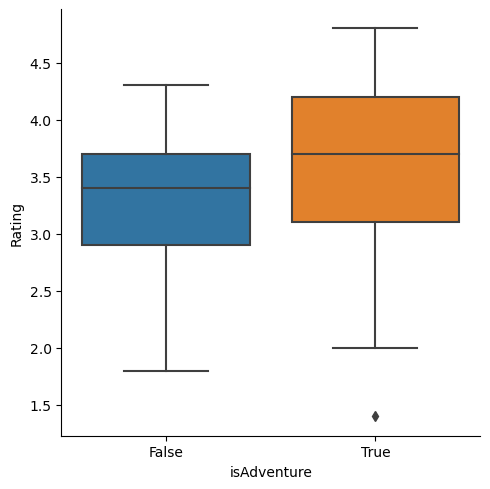

In [27]:
sns.catplot(data=games, x="isAdventure",y="Rating", kind="box")
plt.show()

After doing this t-test with comparing the adventure games vs non adventure games, I can conclude that with the p-value being 0.0003561886274669558, that we can reject the null hypothesis and conclude that there is a difference between the adventure games and non-adventure games in respect to ratings, with Adventure games tending to rate higher in general than non-adventure games.

In [28]:
games["isRPG"] = True
games.loc[games["Genres"].apply(lambda x: "RPG" not in x), "isRPG"] = False

adventure_games = games[games["isRPG"] == True]
not_adventure_games = games[games["isRPG"] == False]
stats.ttest_ind(adventure_games["Rating"], not_adventure_games["Rating"])

Ttest_indResult(statistic=7.384806162397082, pvalue=3.084514273585695e-12)

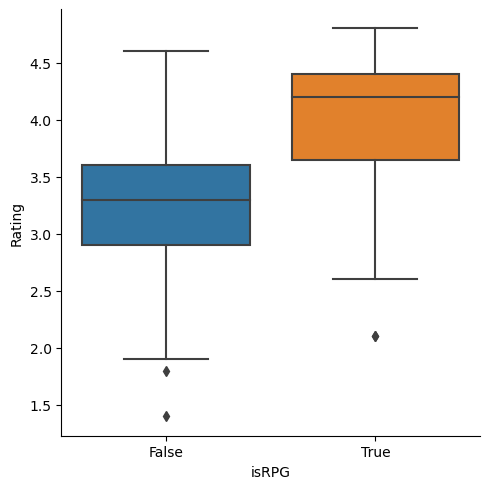

In [29]:
sns.catplot(data=games, x="isRPG",y="Rating", kind="box")
plt.show()

## Logistic Regression 

### Is Nintendo Games

In [30]:
games["isNintendo"] = True
games.loc[games["Team"].apply(lambda x: "Nintendo" not in x), "isNintendo"] = False
Nintendo_games = games[games["isNintendo"] == True]
not_Nintendo_games = games[games["isNintendo"] == False]
stats.ttest_ind(Nintendo_games["Rating"], not_Nintendo_games["Rating"])

Ttest_indResult(statistic=1.3501999990507836, pvalue=0.1783329699582375)

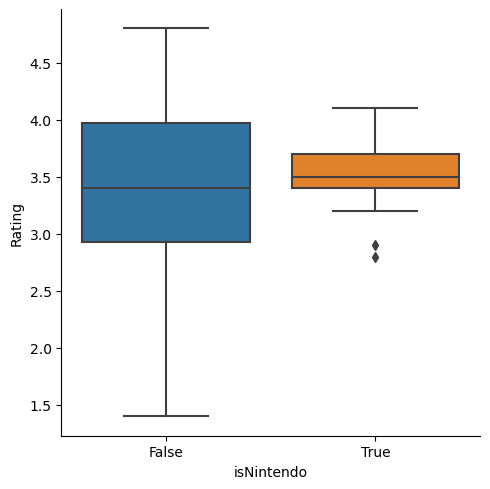

In [31]:
sns.catplot(data=games, x="isNintendo",y="Rating", kind="box")
plt.show()

In [32]:
relevant_data = games.drop(["Title", "Release Date", "Team", "Genres", "Summary", "Reviews", "Times Listed"], axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("isNintendo",axis=1), relevant_data[["isNintendo"]])
print(x_train.head())
reg = linear_model.LogisticRegression().fit(x_train, y_train)

      Rating  Number of Reviews   Plays  Playing  Backlogs  Wishlist  \
679      3.6           405000.0  6000.0  21000.0  403000.0  219000.0   
1361     3.2           160000.0  2200.0  16000.0  414000.0  188000.0   
1280     3.9           354000.0  1700.0  15000.0  387000.0  172000.0   
1335     4.4           151000.0  1100.0  16000.0  213000.0   76000.0   
1384     3.4           195000.0  1900.0  22000.0  313000.0  171000.0   

      isAdventure  isRPG  
679         False  False  
1361         True  False  
1280        False  False  
1335         True  False  
1384         True   True  


C:\Users\Sean4\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
reg.score(x_train, y_train)

0.844311377245509

In [34]:
reg.score(x_test, y_test)

0.875

In [35]:
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

,column,coefficient
2,Plays,-1.877926e-04
5,Wishlist,-7.529973e-06
3,Playing,-6.272175e-06
4,Backlogs,-1.734255e-06
0,Rating,-1.061001e-07
6,isAdventure,-2.425502e-08
7,isRPG,-1.250445e-08
1,Number of Reviews,2.296300e-06


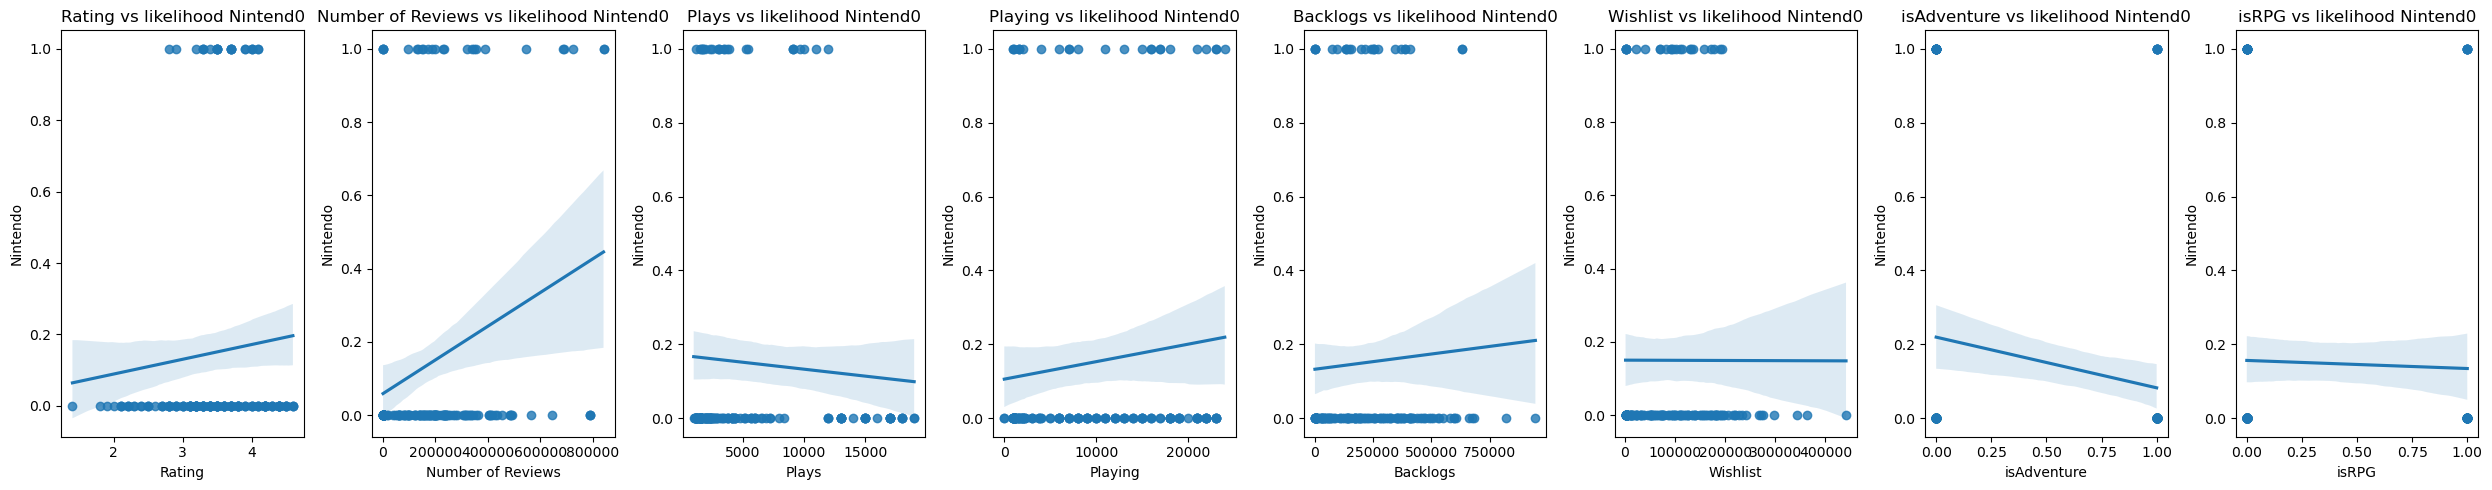

In [36]:
coefs = reg.coef_[0]
coef_names = list(x_train.columns)

# create a dataframe with the coefficients and their names
coef_df = pd.DataFrame({'name': coef_names, 'coef': coefs})

# plot the regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(25, 5))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_train[col], y=y_train.values.ravel(), ax=axs[i])
    axs[i].set_title(f"{col} vs likelihood Nintend0")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Nintendo")
    
plt.tight_layout()
plt.show()

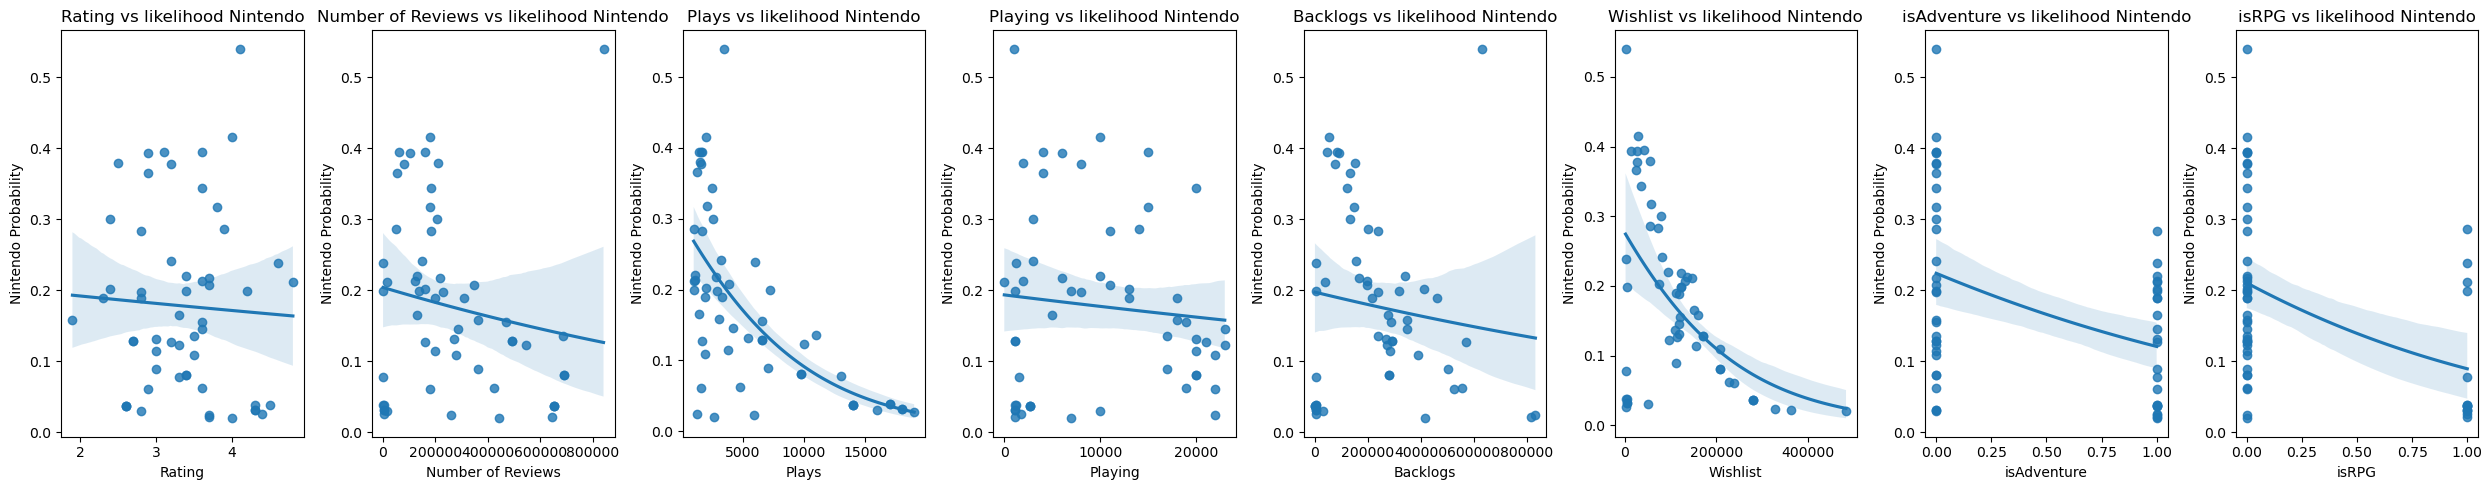

In [37]:
y_pred_prob = reg.predict_proba(x_test)[:, 1]

# Plot regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(25, 5))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_test[col], y=y_pred_prob, ax=axs[i], logistic=True)
    axs[i].set_title(f"{col} vs likelihood Nintendo")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Nintendo Probability")
    
plt.tight_layout()
plt.show()

### Is Adventure Games

In [38]:
games["isAdventure"] = True
games.loc[games["Genres"].apply(lambda x: "Adventure" not in x), "isAdventure"] = False
Adventure_games = games[games["isAdventure"] == True]
not_Adventure_games = games[games["isAdventure"] == False]
print(stats.ttest_ind(Adventure_games["Rating"], not_Adventure_games["Rating"]))
relevant_data = games.drop(["Title", "Release Date", "Team", "Genres", "Summary", "Reviews", "Times Listed"], axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("isAdventure",axis=1), relevant_data[["isAdventure"]])
print(x_train.head())
reg = linear_model.LogisticRegression().fit(x_train, y_train)
print("\nTraining Data Accuracy: "+str(reg.score(x_train, y_train)))
print("Test Data Accuracy: "+str(reg.score(x_test, y_test)) + "\n")
print(pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient"))

Ttest_indResult(statistic=3.6269010738335146, pvalue=0.0003561886274669558)
      Rating  Number of Reviews    Plays  Playing  Backlogs  Wishlist  isRPG  \
796      3.7             1600.0   9100.0   1600.0    2500.0    2100.0   True   
1308     3.3           274000.0   2800.0  23000.0  202000.0  136000.0  False   
785      4.3             2900.0  18000.0   1100.0    6200.0    3600.0   True   
742      3.7           409000.0   4400.0  21000.0  674000.0  343000.0  False   
1285     3.2           334000.0   2200.0  11000.0  450000.0  126000.0  False   

      isNintendo  
796         True  
1308       False  
785        False  
742        False  
1285       False  

Training Data Accuracy: 0.7604790419161677
Test Data Accuracy: 0.7857142857142857

              column   coefficient
3            Playing -5.419456e-05
1  Number of Reviews -6.073891e-06
7         isNintendo -4.419290e-09
0             Rating  8.846606e-09
6              isRPG  1.594328e-08
5           Wishlist  2.911807e-06


C:\Users\Sean4\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
